<a href="https://colab.research.google.com/github/planet-c-am/Line-Chart-with-Forecast/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

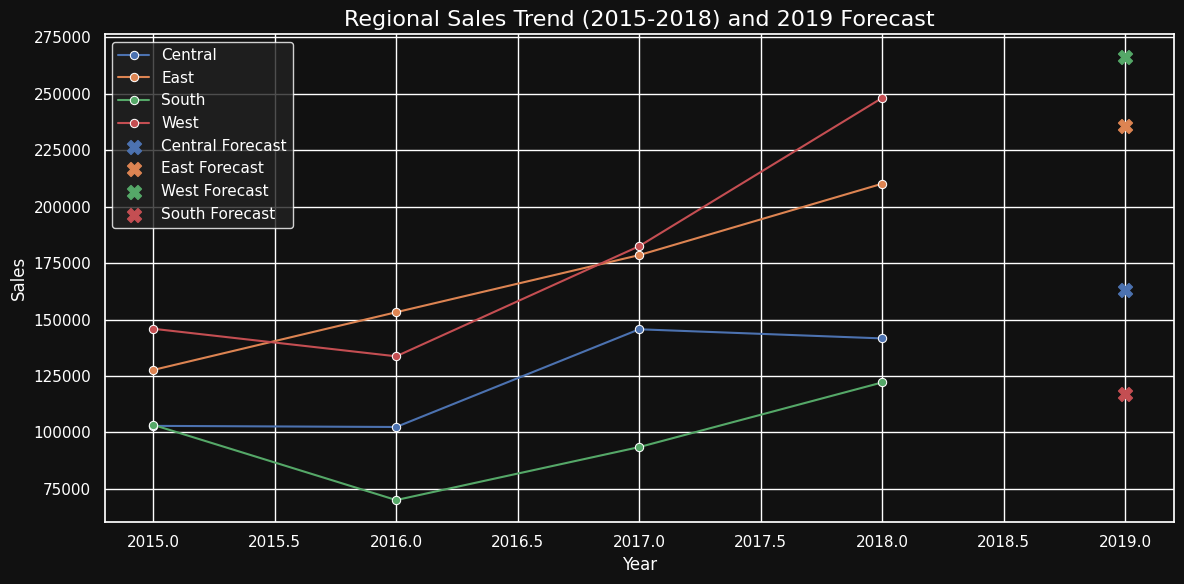


=== 2019 Regional Sales Forecast ===
 Region  2018 Sales  Predicted 2019 Sales  Growth %
Central   141627.34             163004.02     15.09
   East   210129.19             235558.55     12.10
   West   248130.93             266412.56      7.37
  South   122164.57             117245.07     -4.03

=== Business Recommendations ===

1. Increase marketing and logistics investment in regions with highest forecasted growth (e.g., Central).
2. Focus warehousing expansion in top-performing states such as California, New York, Washington, Texas, Pennsylvania, Florida, Michigan, Illinois, North Carolina, Ohio.
3. Reassess resource allocation in underperforming regions to optimize cost efficiency.
4. Use YoY growth trends to tailor marketing campaigns in states with rising sales momentum.
5. Monitor quarterly sales fluctuations to adjust inventory and supply chain proactively.



In [4]:
# @title Regional Sales Trend (2015-2018) and 2019 Forecast
# ===================================================Logical Part=================================================
# Step 1: Import required libraries
import numpy as np
import pandas as pd
from dateutil import parser
from sklearn.linear_model import LinearRegression

# Step 2: Load data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-6XYWtaoxDCiZOi6PQODs_ubL08CvVzL6Q39LOquPGDTCAMQ3xjTpRLDereRI011A7lbxIS7iXsWU/pub?gid=574248564&single=true&output=csv"
df = pd.read_csv(url)

# Step 3: Date parsing function
def try_parse_date(x):
    try:
        return parser.parse(x, dayfirst=False)
    except:
        try:
            return parser.parse(x, dayfirst=True)
        except:
            return pd.NaT

# Step 4: Clean data
df['Order Date'] = df['Order Date'].apply(try_parse_date)
df = df[df['Order Date'].notna()]
df = df[df['Sales'].notna() & (df['Sales'] > 0)]

# Step 5: Feature engineering
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Step 6: Regional total sales per year
region_sales = df.groupby(['Region', 'Year'])['Sales'].sum().reset_index()

# Step 7: Forecast 2019 sales using linear regression
forecast_list = []

for region in region_sales['Region'].unique():
    reg_df = region_sales[region_sales['Region'] == region]
    X = reg_df['Year'].values.reshape(-1, 1)
    y = reg_df['Sales'].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    pred_2019 = model.predict([[2019]])[0][0]
    actual_2018 = reg_df[reg_df['Year'] == 2018]['Sales'].values[0]
    growth_pct = ((pred_2019 - actual_2018) / actual_2018) * 100

    forecast_list.append({
        'Region': region,
        '2018 Sales': actual_2018,
        'Predicted 2019 Sales': pred_2019,
        'Growth %': growth_pct
    })

forecast_df = pd.DataFrame(forecast_list).sort_values(by='Growth %', ascending=False)


# ===================================================Design Part=================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: theme / style
sns.set_theme(style='darkgrid', rc={
    'axes.facecolor':'#111111',
    'figure.facecolor':'#111111',
    'axes.labelcolor':'white',
    'xtick.color':'white',
    'ytick.color':'white',
    'text.color':'white'
})

# Step 2: polt figure size and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Step 3: Line plot
sns.lineplot(data=region_sales, x='Year', y='Sales', hue='Region', marker='o', ax=ax)

# Step 4: Plot 2019 forecast as X marker
for _, row in forecast_df.iterrows():
    ax.scatter(2019, row['Predicted 2019 Sales'], marker='X', s=100, label=f"{row['Region']} Forecast")

# Step 5: Axis labels, title, legend
ax.set_title('Regional Sales Trend (2015-2018) and 2019 Forecast', color='white', fontsize=16)
ax.set_xlabel('Year', color='white')
ax.set_ylabel('Sales', color='white')
ax.legend(facecolor='#222222', framealpha=0.8, edgecolor='white', labelcolor='white')
ax.tick_params(colors='white')

plt.savefig('Regional Sales Trend (2015-2018) and 2019 Forecast.pdf')
plt.savefig('Regional Sales Trend (2015-2018) and 2019 Forecast.png')
# Step 6: Final layout
plt.tight_layout()
plt.show()

# Step 7: Print Forecast Table and Business Recommendations
print("\n=== 2019 Regional Sales Forecast ===")
print(forecast_df.round(2).to_string(index=False))

print("\n=== Business Recommendations ===")
print(f"""
1. Increase marketing and logistics investment in regions with highest forecasted growth (e.g., {forecast_df.iloc[0]['Region']}).
2. Focus warehousing expansion in top-performing states such as {', '.join(top_10_states)}.
3. Reassess resource allocation in underperforming regions to optimize cost efficiency.
4. Use YoY growth trends to tailor marketing campaigns in states with rising sales momentum.
5. Monitor quarterly sales fluctuations to adjust inventory and supply chain proactively.
""")
